In [2]:
import numpy as np

import matplotlib.pyplot as plt 


In [42]:
np.random.seed(42)

x = np.linspace(0, 10, 100)

y = x + 3 +  np.random.normal(0, 1, size=100)



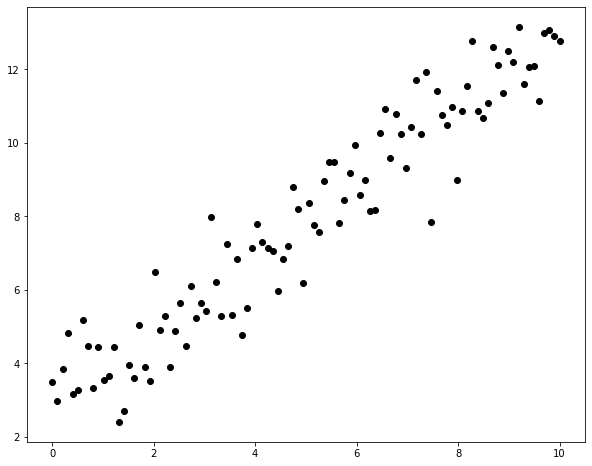

In [56]:
plt.figure(figsize=(10 , 8))

plt.scatter(x, y, c='k', marker="o")
plt.show()

In [16]:
A = np.hstack( ( x.reshape(100,1), np.ones((x.shape[0],1)) )  )

b = y.reshape(y.shape[0], 1)

In [19]:
u, sigma, v = np.linalg.svd(A)

sigma = np.diag(sigma)

In [22]:
padding = np.zeros((u.shape[0]- sigma.shape[0], sigma.shape[1]))

sigma = np.vstack((sigma, padding))

In [24]:
A_dagger = np.linalg.pinv(A)

slope, intersect = A_dagger @ b

In [66]:
intersect, slope

(array([2.82718715]), array([1.01379327]))

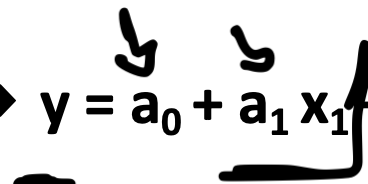

In [67]:
y_pred = 2.82718715+1.01379327*x

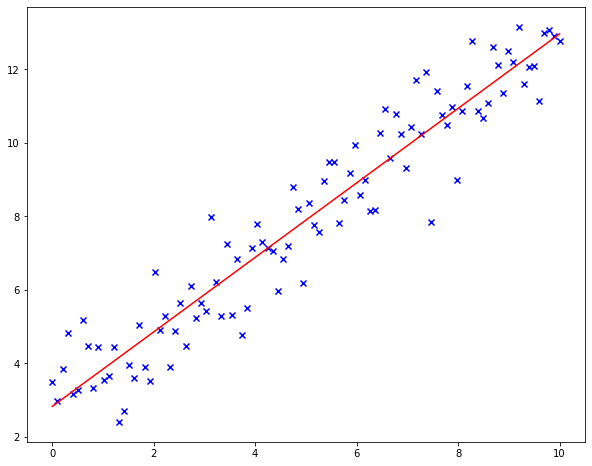

In [68]:
plt.figure(figsize=(10 , 8))

plt.scatter(x, y, c='b', marker="x") # data

plt.plot(x, y_pred, c="red") # line
plt.show()

--------

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 

In [2]:
bmi_df = pd.read_csv("/Users/ahmed/Partition_A/work/Amit/ML/session 1 & 2/sesssion 1 notebooks/bmi_and_life_expectancy.csv")

bmi_df


FileNotFoundError: [Errno 2] No such file or directory: '/Users/ahmed/Partition_A/work/Amit/ML/session 1 & 2/sesssion 1 notebooks/bmi_and_life_expectancy.csv'

In [ ]:
np.array(bmi_df[['BMI']]).reshape(-1,1)

In [ ]:
LR_model = LinearRegression()

In [ ]:
type(LR_model)

In [ ]:
bmi_df.iloc[:,1:]

In [123]:
LR_model.fit(np.array(bmi_df[['BMI']]).reshape(-1,1), bmi_df['Life expectancy'] )

LinearRegression()

In [124]:
LR_model.intercept_

7.227838343304811

In [125]:
LR_model.predict(np.array("20.68321").reshape(-1,1))

/Users/ahmed/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


array([59.31807746])

In [126]:
pred = LR_model.predict(np.array(bmi_df[['BMI']]).reshape(-1,1))

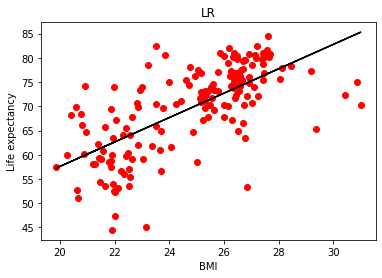

In [127]:
plt.scatter(bmi_df[['BMI']], bmi_df[['Life expectancy']], color="red")

plt.plot(bmi_df[['BMI']], pred, color="k")

plt.title("LR")

plt.xlabel("BMI")

plt.ylabel("Life expectancy")

plt.show()


In [128]:
LR_model.score(bmi_df[['BMI']], bmi_df[['Life expectancy']])

0.4634455864661575

----------

In [131]:
from sklearn.linear_model import LinearRegression

from sklearn.datasets import load_boston

In [132]:
boston_data = load_boston()

In [135]:
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [142]:
X = boston_data['data']
y = boston_data['target']

In [143]:
LR_Model = LinearRegression()

In [144]:
LR_Model.fit(X, y)

LinearRegression()

In [145]:
sample_house = [[2.29690000e-01, 0.00000000e+00, 1.05900000e+01, 0.00000000e+00, 4.89000000e-01,
                6.32600000e+00, 5.25000000e+01, 4.35490000e+00, 4.00000000e+00, 2.77000000e+02,
                1.86000000e+01, 3.94870000e+02, 1.09700000e+01]]

In [146]:
LR_Model.predict(sample_house)

array([23.68284712])

In [147]:
predection = LR_Model.predict(X)

In [148]:
LR_Model.score(X, predection)

1.0

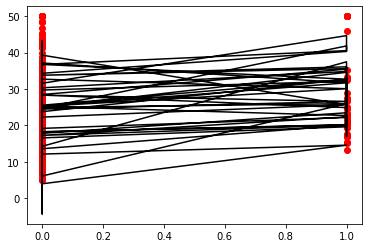

In [157]:
plt.scatter(X[:,3], y, color="red")

plt.plot(X[:,3], predection, color="k")

--------

In [164]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [159]:
train_data = pd.read_csv('/Users/ahmed/Partition_A/work/Amit/ML/session 1 & 2//sesssion 1 notebooks/Poly_data.csv')
X = train_data['Var_X'].values.reshape(-1, 1)
y = train_data['Var_Y'].values


In [162]:
X

array([[-0.33532],
       [ 0.0216 ],
       [-1.19438],
       [-0.65046],
       [-0.28001],
       [ 1.93258],
       [ 1.2262 ],
       [ 0.74727],
       [ 3.32853],
       [ 2.87457],
       [-1.48662],
       [ 0.37629],
       [ 1.43918],
       [ 0.24183],
       [-2.7914 ],
       [ 1.08176],
       [ 2.81555],
       [ 0.54924],
       [ 2.36449],
       [-1.01925]])

In [165]:
poly_feat = PolynomialFeatures(degree=4)

X_poly = poly_feat.fit_transform(X)

# x1 x2 x3 x4 

# x1^2 , x2^2 , x3^2 , x4^2 , x1x2, x1x3, x1x4, x2x3, ....

x1 degree = 4

x1, x1^2, x1^3 , x1^4

In [181]:
X_poly[:,0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [173]:
poly_model = LinearRegression()

poly_model.fit(X_poly, y)

predicitons = poly_model.predict(X_poly)

poly_model.score(X_poly, y)

0.953258192498001

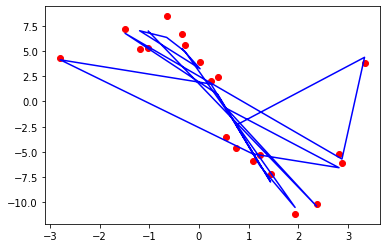

In [178]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, predicitons, color = 'blue')

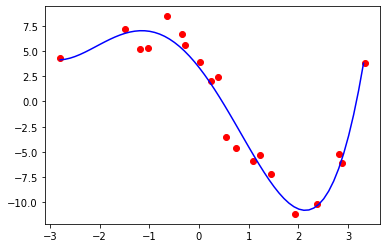

In [176]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)

X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')

plt.plot(X_grid, poly_model.predict(poly_feat.fit_transform(X_grid)), color = 'blue')
plt.show()